# 1. Install Dependencies and Setup

In [21]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

pre = Precision()
re = Recall()
acc = BinaryAccuracy()



In [22]:
data_dir = '../P4/train'

In [23]:
birds = sorted(os.listdir(data_dir))
print(birds)

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN DIPPER', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN ROBIN', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'ASIAN GREEN BEE EATER', 'ASIAN OPENBILL STORK', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASIAN FIGBIRD', 'AVADAVAT', 'AZARAS SPINETAIL', 'AZURE BREASTED PITTA', 'AZURE JAY', 'AZURE TANAGER', '

# 3. Load Data

In [5]:
#########
train = tf.keras.utils.image_dataset_from_directory('../P4/train', label_mode='categorical', labels='inferred')

val = tf.keras.utils.image_dataset_from_directory('../P4/valid', label_mode='categorical', labels='inferred')

test = tf.keras.utils.image_dataset_from_directory('../P4/test', label_mode='categorical', labels='inferred')


Found 18748 files belonging to 118 classes.
Found 590 files belonging to 118 classes.
Found 590 files belonging to 118 classes.


# 4. Scale Data

In [6]:
train = train.map(lambda x,y: (x/255, y))
val = val.map(lambda x,y: (x/255, y))
test = test.map(lambda x,y: (x/255, y))



# 6. Build Deep Learning Model

In [7]:

model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Dropout(0.2))  # Add dropout here
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))  # Add dropout here
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))  # Add dropout here
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Add dropout before the output layer
model.add(Dense(len(birds), activation='softmax'))

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\jmare\OneDrive\Documents\Clicker\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 118)            │        30,326 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,726,694 (14.22 MB)

 Trainable params: 3,726,694 (14.22 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [8]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# Define data augmentation layers
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
])

# Apply data augmentation to the training dataset
train = train.map(lambda x, y: (data_augmentation(x), y))


In [20]:
logdir='/content/drive/MyDrive/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [9]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[early_stopping])


Epoch 1/30
586/586 ━━━━━━━━━━━━━━━━━━━━ 306s 515ms/step - accuracy: 0.0099 - loss: 4.7776 - val_accuracy: 0.0305 - val_loss: 4.3889
Epoch 2/30
586/586 ━━━━━━━━━━━━━━━━━━━━ 299s 510ms/step - accuracy: 0.0561 - loss: 4.2968 - val_accuracy: 0.1712 - val_loss: 3.6783
Epoch 3/30
586/586 ━━━━━━━━━━━━━━━━━━━━ 300s 511ms/step - accuracy: 0.1360 - loss: 3.7034 - val_accuracy: 0.2847 - val_loss: 3.0987
Epoch 4/30
586/586 ━━━━━━━━━━━━━━━━━━━━ 299s 509ms/step - accuracy: 0.1964 - loss: 3.3521 - val_accuracy: 0.3051 - val_loss: 2.9340
Epoch 5/30
586/586 ━━━━━━━━━━━━━━━━━━━━ 297s 507ms/step - accuracy: 0.2342 - loss: 3.1511 - val_accuracy: 0.4017 - val_loss: 2.6103
Epoch 6/30
586/586 ━━━━━━━━━━━━━━━━━━━━ 298s 509ms/step - accuracy: 0.2646 - loss: 2.9928 - val_accuracy: 0.4068 - val_loss: 2.5757
Epoch 7/30
586/586 ━━━━━━━━━━━━━━━━━━━━ 292s 497ms/step - accuracy: 0.2847 - loss: 2.8964 - val_accuracy: 0.4525 - val_loss: 2.3294
Epoch 8/30
586/586 ━━━━━━━━━━━━━━━━━━━━ 293s 500ms/step - accuracy: 0.2996 -

# 8. Plot Performance

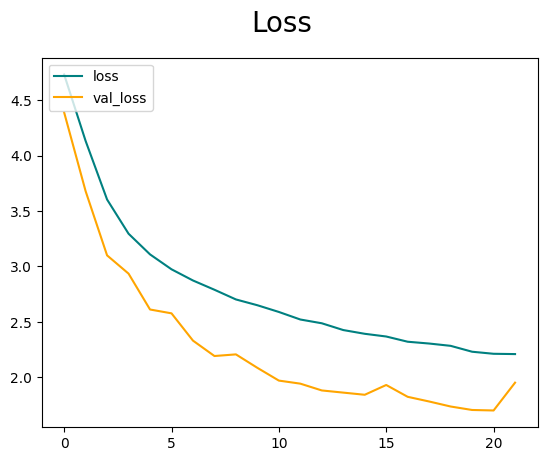

In [10]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

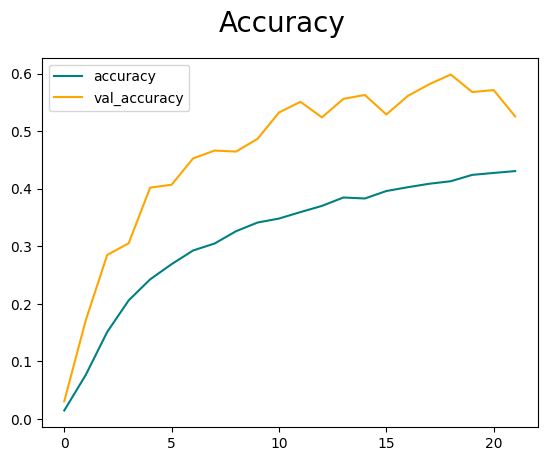

In [11]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [14]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [16]:
print(f'Precision: {pre.result()},Recall: {re.result()}, Accuracy: {acc.result()}')

Precision: 0.893048107624054,Recall: 0.2830508351325989, Accuracy: 0.9936367273330688


# 10. Test

In [18]:

def preprocess_image(image_path, target_size=(256, 256)):
    # Read the image
    image = cv2.imread(image_path)
    # Resize the image to the target size
    image = cv2.resize(image, target_size)
    # Convert the image to float32 and normalize its pixel values to the range [0, 1]
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Expand the dimensions to create a batch of size 1
    image = np.expand_dims(image, axis=0)
    return image


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


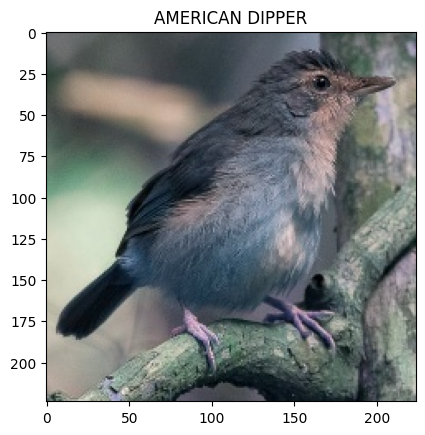

In [19]:


image_path = '../P4/test/ABBOTTS BABBLER/5.jpg'
preprocessed_image = preprocess_image(image_path)
predicted_probabilities = model.predict(preprocessed_image)[0]
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = birds[predicted_class_index]

plt.imshow(cv2.imread(image_path))
plt.title(predicted_class_name)
plt.show()


# 11. Save the Model

In [89]:
model.save(os.path.join('models','imageclassifier.h5'))

In [1]:
new_model = load_model('imageclassifier.h5')

NameError: name 'load_model' is not defined

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))